### Imports

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

### Loading the original image

The shape of the original image: (256, 256)


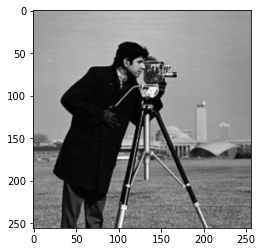

In [39]:
parent_dir_orig = './standard_test_images'
image_name_orig = 'cameraman.jpg'

#Loading a grayscale 256 by 256 image
img = cv.resize(cv.imread(os.path.join(parent_dir_orig, image_name_orig), 0), (256,256))

print(f'The shape of the original image: {img.shape}')

#Visualizing the original image
plt.imshow(img, cmap = 'gray')

### Downsampling the original image

The shape of the downsampled image (Using OpenCV) : (127, 127)


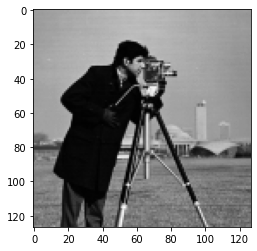

In [35]:
img_ds_orig = cv.resize(img, (127,127))

print(f'The shape of the downsampled image (Using OpenCV) : {img_ds_orig.shape}')

#Visualizing the downsampled image
plt.imshow(img_ds_orig, cmap = 'gray')

### Loading the downsampled image (From the processor)

The shape of the downsampled image (Using our processor): (127, 127)


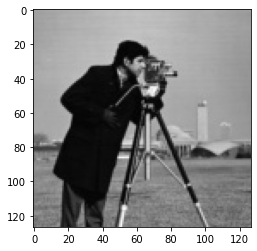

In [11]:
parent_dir_processed = './standard_test_images_downsampled'
image_name_processed = 'cameraman_downsampled.jpg'

#Loading a grayscale 256 by 256 image
img_ds = cv.imread(os.path.join(parent_dir_processed, image_name_processed), 0)

print(f'The shape of the downsampled image (Using our processor): {img_ds.shape}')

#Visualizing the original image
plt.imshow(img_ds, cmap = 'gray')

### Error analysis

In [33]:
print('Error analysis: Started')
print('...............................................')

img_ds_flat = np.reshape(img_ds, 16129)
img_ds_orig_flat = np.reshape(img_ds_orig, 16129)

# calculating the parameters for the analysis
c_1 = (0.01*255)**2
c_2 = (0.03*255)**2
c_3 = c_2/2
mu_p = np.mean(img_ds_flat)
mu_o = np.mean(img_ds_orig_flat)
sigma_p = np.std(img_ds_flat)
sigma_o = np.std(img_ds_orig_flat)
sigma_op = np.mean(np.cov(img_ds_flat, img_ds_orig_flat))

print('Computing the root mean squared error...........')

# Computing the root mean squared error
mse = np.power(np.sum(np.power(img_ds_flat - img_ds_orig_flat,2))/16129, 0.5)
print(f'The root mean squared error: {mse}')
print('\n')

print('Computing the luminance similarity...........')

# Computing the luminance similarity
lum = (2*mu_o*mu_p + c_1)/(mu_o**2 + mu_p**2 + c_1)
print(f'The luminance similarity: {lum}')
print('\n')

print('Computing the contrast similarity...........')

# Computing the contrast similarity
con = (2*sigma_o*sigma_p + c_2)/(sigma_o**2 + sigma_p**2 + c_3)
print(f'The contrast similarity: {con}')
print('\n')


print('Computing the structure similarity...........')

# Computing the structure similarity
struc = (sigma_op + c_3)/(sigma_o*sigma_p + c_3)
print(f'The structure similarity: {struc}')

print('...............................................')
print('Error analysis : Completed!')

Error analysis: Started
...............................................
Computing the root mean squared error...........
The root mean squared error: 5.36559722484526


Computing the luminance similarity...........
The luminance similarity: 0.9999896148048144


Computing the contrast similarity...........
The contrast similarity: 1.0039373498088133


Computing the structure similarity...........
The structure similarity: 0.9923780774992024
...............................................
Error analysis : Completed!
